In [ ]:
# Iris Species Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("iris.csv")
print(data)

     Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  \
0             1           5.1          3.5           1.4          0.2   
1             2           4.9          3.0           1.4          0.2   
2             3           4.7          3.2           1.3          0.2   
3             4           4.6          3.1           1.5          0.2   
4             5           5.0          3.6           1.4          0.2   
..          ...           ...          ...           ...          ...   
145         146           6.7          3.0           5.2          2.3   
146         147           6.3          2.5           5.0          1.9   
147         148           6.5          3.0           5.2          2.0   
148         149           6.2          3.4           5.4          2.3   
149         150           5.9          3.0           5.1          1.8   

       Species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145 

In [ ]:
data.shape

(150, 6)

In [ ]:
data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print("No of Versicolor in Dataset:",len(data[data['Species'] == 'versicolor']))
print("No of Virginica in Dataset:",len(data[data['Species'] == 'virginica']))
print("No of Setosa in Dataset:",len(data[data['Species'] == 'setosa']))

No of Versicolor in Dataset: 50
No of Virginica in Dataset: 50
No of Setosa in Dataset: 50


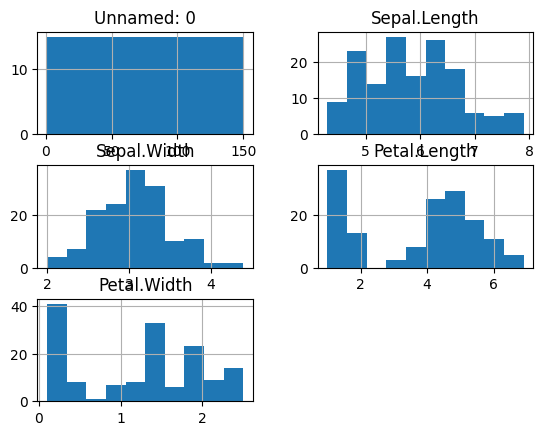

In [ ]:
data.hist()
plt.show()

<Axes: xlabel='Species', ylabel='Sepal.Width'>

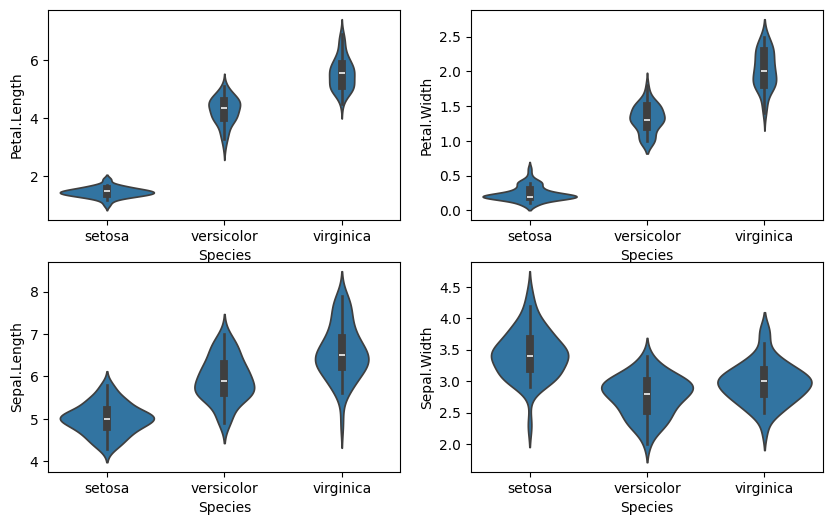

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='Petal.Length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='Petal.Width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='Sepal.Length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='Sepal.Width',data=data)

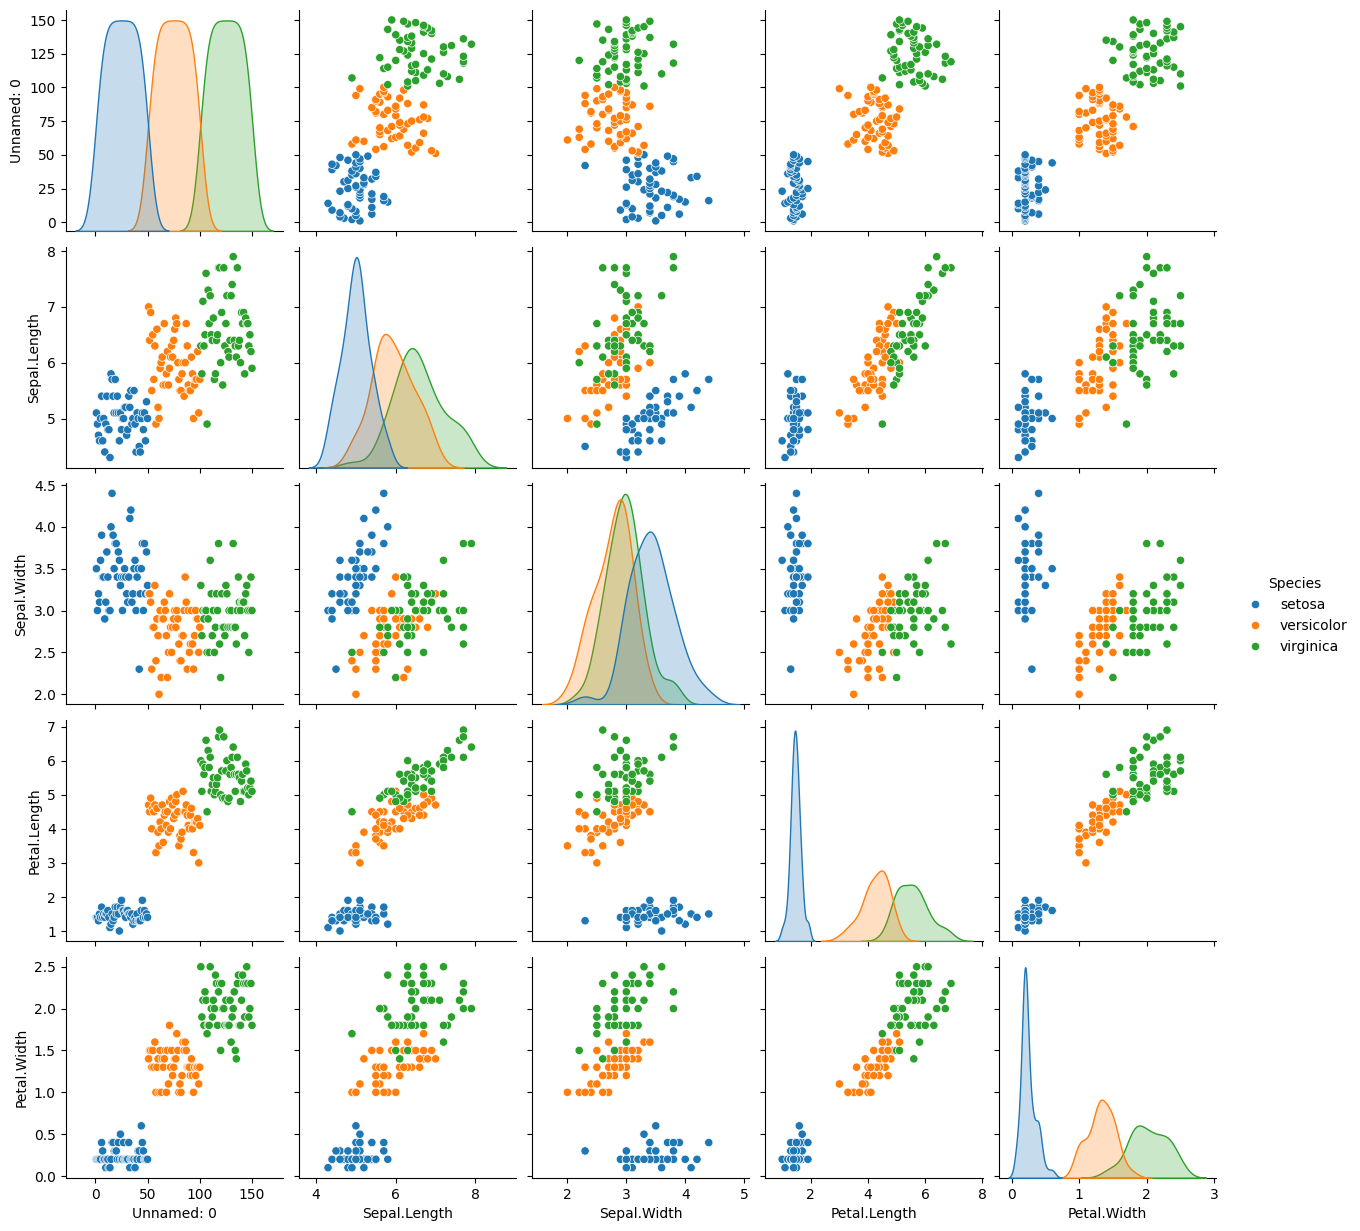

In [ ]:
sns.pairplot(data, hue='Species')

<ipython-input-25-61704126fad6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig=sns.heatmap(data.corr(),annot=True, vmin=-1, vmax=1)


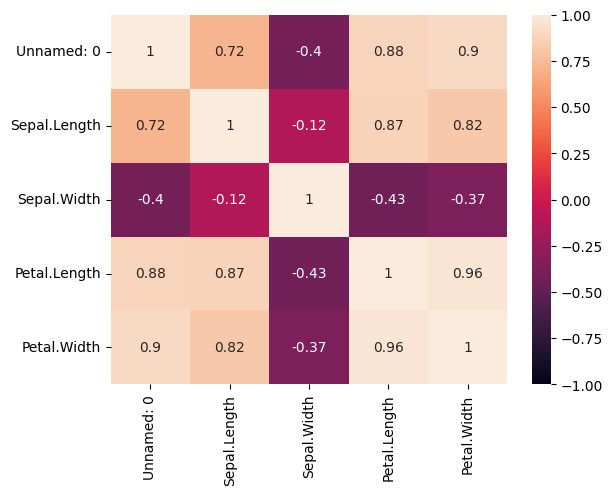

In [ ]:
fig=plt.gcf()
fig=sns.heatmap(data.corr(),annot=True, vmin=-1, vmax=1)

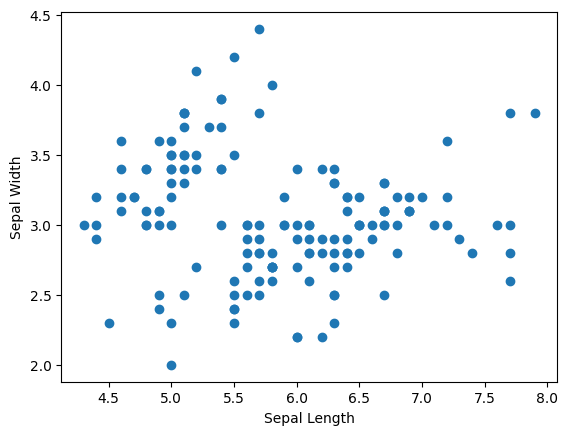

In [ ]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(data['Sepal.Length'].values.reshape(-1,1), data['Sepal.Width'].values.reshape(-1,1))
plt.show()

In [ ]:
corr = data.corr()
corr

<ipython-input-30-df690e1cacaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Unnamed: 0,1.000000,0.716676,-0.402301,0.882637,0.900027
Sepal.Length,0.716676,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.882637,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.900027,0.817941,-0.366126,0.962865,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)

train_X = train[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
test_y = test.Species

(105, 6)
(45, 6)


In [ ]:
#Logistic Regression

model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

In [ ]:
#Confusion matrix for LR

confusion_mat = confusion_matrix(test_y,prediction)
print(confusion_mat)
print(classification_report(test_y,prediction))

[[17  0  0]
 [ 0 14  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
#Support Vector Machine

model = SVC()
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print('Accuracy:', accuracy_score(test_y,pred_y))

In [ ]:
# K-Nearest Neighbors

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("Accuracy:",accuracy_score(test_y,pred_y))

In [ ]:
#Decision Tree

model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(train_X,train_y)
pred_y = model.predict(test_X)

print("Accuracy:",accuracy_score(test_y,pred_y))